In [6]:
# NYT Developers Call Limit

# there are two rate limits per API: 4,000 requests per day and 10 requests per minute. 

# You should sleep 6 seconds between calls to avoid hitting the per minute rate limit.

In [7]:
# Sign up for an API key here               https://developer.nytimes.com

In [52]:

import pandas as pd
import numpy as np

import requests

from datetime import timedelta, date

import time

import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters

import PIL.Image
from pylab import *
from wordcloud import WordCloud, STOPWORDS

import markovify


In [9]:
# ENTER YOUR OWN NYT DEVELOPER API KEY HERE


api_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'           # <------------------ ENTER API KEY HERE

In [10]:
# pull lists from nyt api

lists = requests.get('https://api.nytimes.com/svc/books/v3//lists/names.json?api-key=' + api_key)

print("Please show me 200...", lists.status_code)

     
# Wait for 70 seconds

time.sleep(70)

Please show me 200... 200


In [11]:
# put into dataframe

lists_data = lists.json()['results']
lists_data = pd.DataFrame.from_dict(lists_data)
lists_data

,list_name,display_name,list_name_encoded,oldest_published_date,newest_published_date,updated
0,Combined Print and E-Book Fiction,Combined Print & E-Book Fiction,combined-print-and-e-book-fiction,2011-02-13,2020-04-26,WEEKLY
1,Combined Print and E-Book Nonfiction,Combined Print & E-Book Nonfiction,combined-print-and-e-book-nonfiction,2011-02-13,2020-04-26,WEEKLY
2,Hardcover Fiction,Hardcover Fiction,hardcover-fiction,2008-06-08,2020-04-26,WEEKLY
3,Hardcover Nonfiction,Hardcover Nonfiction,hardcover-nonfiction,2008-06-08,2020-04-26,WEEKLY
4,Trade Fiction Paperback,Paperback Trade Fiction,trade-fiction-paperback,2008-06-08,2020-04-26,WEEKLY
5,Mass Market Paperback,Paperback Mass-Market Fiction,mass-market-paperback,2008-06-08,2017-01-29,WEEKLY
6,Paperback Nonfiction,Paperback Nonfiction,paperback-nonfiction,2008-06-08,2020-04-26,WEEKLY
7,E-Book Fiction,E-Book Fiction,e-book-fiction,2011-02-13,2017-01-29,WEEKLY
8,E-Book Nonfiction,E-Book Nonfiction,e-book-nonfiction,2011-02-13,2017-01-29,WEEKLY
9,Hardcover Advice,Hardcover Advice & Misc.,hardcover-advice,2008-06-08,2013-04-21,WEEKLY


In [12]:
# get a list of dates... enter relevant dates into start_date and stop_date variable

from datetime import timedelta, date


dates = []

start_date = date(2011, 2, 13)                         # <------------------ ENTER START DATE HERE
end_date = date(2020, 4, 22)                            # <------------------ ENTER END DATE HERE

delta = timedelta(days=7)

while start_date <= end_date:
    
    dates.append(start_date.strftime("%Y-%m-%d"))
    start_date += delta


In [13]:
# group dates into chunks of 10 for the api call size    (maximum is 10 a minute, 4000 a day)


def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))


chunks = []

for group in chunker(dates, 10):
   
    chunks.append(group)
 
    

In [14]:
# type in the name of the best sellers list you would wish to query make sure to type it in correctly 
# you can find all options from the list_name_encoded column in the 'list' dataframe above
# however please choose only the lists that are updated WEEKLY as that is how I set up the code


list_name = 'combined-print-and-e-book-fiction'       # <------------------ ENTER LIST NAME HERE

In [15]:
# api call create and append dataframe


api_url_start = 'https://api.nytimes.com/svc/books/v3/lists/'       # generate generic api url
api_url_end = ('/' + list_name  + '.json?api-key=')                 # add in list name



genre_df = pd.DataFrame()                                           # create empty dataframe


for chunk in chunks:                                                # pull 10 dates at a time from total dates
    
    
    for date in chunk:                                              # pull one date at a time from the 10
    
        url = (api_url_start +  date   + api_url_end)               # put togehter api url parts
        response = requests.get(url + api_key)                      # pull from api with key
    
        genre = response.json()                                     # create variable for json file
        genre = pd.DataFrame.from_dict(genre)                       # create dataframe from json file 
        
        books_df = pd.DataFrame.from_dict(genre.iloc[1,4])          # select only book info from dataframe
        
        books_df['bestsellers-date'] = genre.iloc[9,4]              # create and join column for bestsellers dates
        
        genre_df = genre_df.append(books_df, ignore_index=True, sort=True)      # append 15 books to dataframe

        
    
    
        # select only relevant columns add bestsellers date (you may wish to add or delete some)  

        genre_df = genre_df[['bestsellers-date', 'author', 'description', 'price', 'publisher', 'rank', 'rank_last_week', 'title', 'weeks_on_list' ]]
    
    
    
# Wait for 70 seconds to not max out the api call limit  ...and repeat for the next 10 dates

    time.sleep(70)


# show dataframe    

genre_df


,bestsellers-date,author,description,price,publisher,rank,rank_last_week,title,weeks_on_list
0,2011-02-13,James Patterson and Michael Ledwidge,The New York detective Michael Bennett enlists...,0,"Little, Brown",1,0,TICK TOCK,1
1,2011-02-13,Stieg Larsson,A hacker and a journalist investigate the disa...,0,Knopf Doubleday,2,0,THE GIRL WITH THE DRAGON TATTOO,1
2,2011-02-13,Stieg Larsson,In the second volume of the Millennium trilogy...,0,Knopf Doubleday,3,0,THE GIRL WHO PLAYED WITH FIRE,1
3,2011-02-13,Stieg Larsson,"The third volume of the Millennium trilogy, ab...",0,Knopf Doubleday,4,0,THE GIRL WHO KICKED THE HORNET’S NEST,1
4,2011-02-13,Sara Gruen,"After his parents die in a car accident, young...",0,Algonquin,5,0,WATER FOR ELEPHANTS,1
...,...,...,...,...,...,...,...,...,...
8755,2020-04-19,Emily St John Mandel,Years after an international Ponzi scheme fall...,0,Knopf,11,8,THE GLASS HOTEL,2
8756,2020-04-19,Sally Rooney,The connection between a high school star athl...,0,Hogarth,12,0,NORMAL PEOPLE,3
8757,2020-04-19,Hilary Mantel,The third book in the Wolf Hall trilogy. After...,0,Holt,13,12,THE MIRROR & THE LIGHT,4
8758,2020-04-19,Helen Hardt,The 13th book in the Steel Brothers Saga.,0,Waterhouse,14,0,FATE,1


In [16]:
# save dateframe to csv file  (UNHASH THE LINE)

# genre_df.to_csv('combined_print_and_e_book_fiction.csv')
   
genre_df = pd.read_csv('combined_print_and_e_book_fiction.csv')    
    

In [28]:
# see all column choices

genre_df.columns

Index(['Unnamed: 0', 'bestsellers-date', 'author', 'description', 'price',
       'publisher', 'rank', 'rank_last_week', 'title', 'weeks_on_list'],
      dtype='object')

In [35]:
genre_df = pd.read_csv('combined_print_and_e_book_fiction.csv')

In [61]:
# rank and plot the weeks on the list 

popular = genre_df['title'].value_counts()

popular = pd.DataFrame(popular).reset_index()

popular = popular.rename(columns={"index": "title", "title": "count"})

popular = popular.loc[popular['count']>=52]

popular

,title,count
0,GONE GIRL,131
1,THE GIRL ON THE TRAIN,107
2,ALL THE LIGHT WE CANNOT SEE,99
3,FIFTY SHADES OF GREY,93
4,WHERE THE CRAWDADS SING,82
5,A GAME OF THRONES,80
6,THE NIGHTINGALE,78
7,FIFTY SHADES DARKER,74
8,THE TATTOOIST OF AUSCHWITZ,69
9,FIFTY SHADES FREED,65


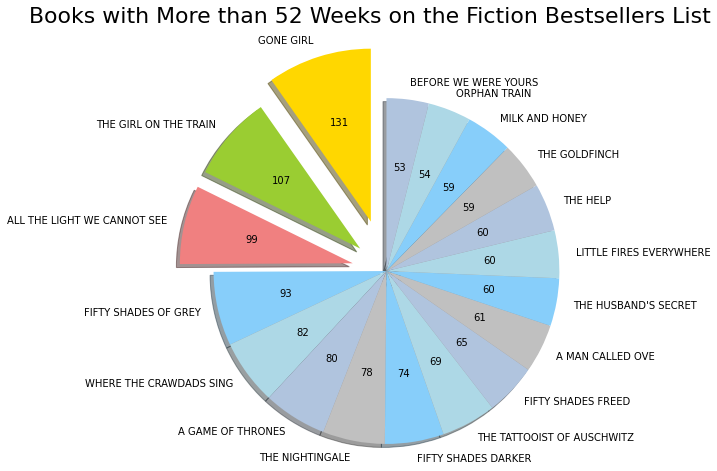

In [62]:
# Data to plot... make sure explode has same number of 

labels = popular['title']
sizes = popular['count']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightblue','lightsteelblue','silver', 'lightskyblue', 'lightblue','lightsteelblue','silver', 'lightskyblue', 'lightblue','lightsteelblue','silver', 'lightskyblue', 'lightblue','lightsteelblue']
explode = (0.3, 0.2, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(8,8))


# show values instead of percentages
def absolute_value(val):
    a  = sizes[ np.abs(sizes - val/100.*sizes.sum()).idxmin() ]
    return a


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct=absolute_value, shadow=True, startangle=90)


plt.axis('equal')
plt.title('Books with More than 52 Weeks on the Fiction Bestsellers List', fontsize=22)
plt.show()

In [38]:
# rank and plot the most popular book authors by weeks on the list 

popular = genre_df['author'].value_counts()

popular = pd.DataFrame(popular).reset_index()

popular = popular.rename(columns={"index": "author", "author": "count"})

popular = popular.loc[popular['count']>=100]

popular

,author,count
0,E L James,278
1,John Grisham,274
2,David Baldacci,208
3,Gillian Flynn,179
4,Nora Roberts,156
5,Nicholas Sparks,150
6,Stephen King,145
7,Lee Child,140
8,Liane Moriarty,131
9,Michael Connelly,124


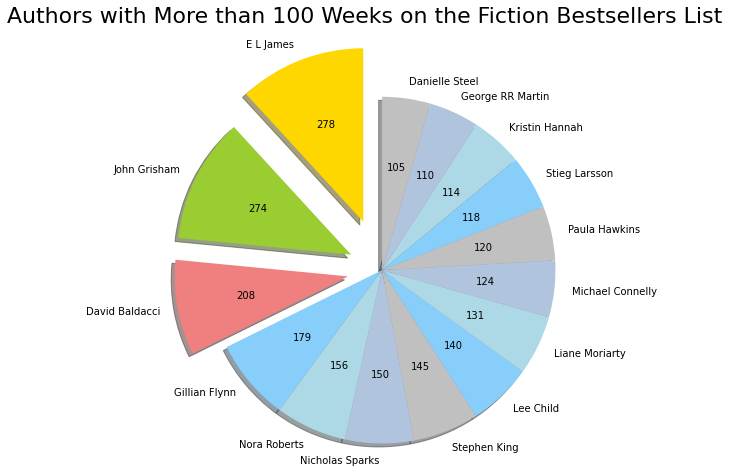

In [39]:
# Data to plot... (make sure explode has same number of elements as your popular list)

labels = popular['author']
sizes = popular['count']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightblue','lightsteelblue','silver', 'lightskyblue', 'lightblue','lightsteelblue','silver', 'lightskyblue', 'lightblue','lightsteelblue','silver']
explode = (0.3, 0.2, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(8, 8))

# show values instead of percentages
def absolute_value(val):
    a  = sizes[ np.abs(sizes - val/100.*sizes.sum()).idxmin() ]
    return a


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct=absolute_value, shadow=True, startangle=90)


plt.axis('equal')
plt.title('Authors with More than 100 Weeks on the Fiction Bestsellers List', fontsize=22)
plt.show()

In [40]:
# drop duplicate titles and keep the first occurance 
# (sometimes books get republished and the descriptions get updated so we want the first editions)

titles = genre_df.drop_duplicates(subset='title', keep='first')


In [45]:
# create wordbank from descriptions

wordbank = titles['description'].unique()

wordbank 

array(['The New York detective Michael Bennett enlists the help of a former colleague to solve a rash of horrifying crimes that are throwing the city into chaos.',
       'A hacker and a journalist investigate the disappearance of a Swedish heiress 40 years earlier; the first volume in the Millennium trilogy.',
       'In the second volume of the Millennium trilogy, a Swedish hacker becomes a murder suspect.',
       ...,
       'A Texas Ranger goes to a small town to investigate whether an accidental death was actually a murder.',
       'The 13th book in the Steel Brothers Saga.',
       'As a bill that may hurt the rights of Native Americans goes to Congress in 1953, domestic issues arise for plant workers near the Turtle Mountain Reservation in North Dakota.'],
      dtype=object)

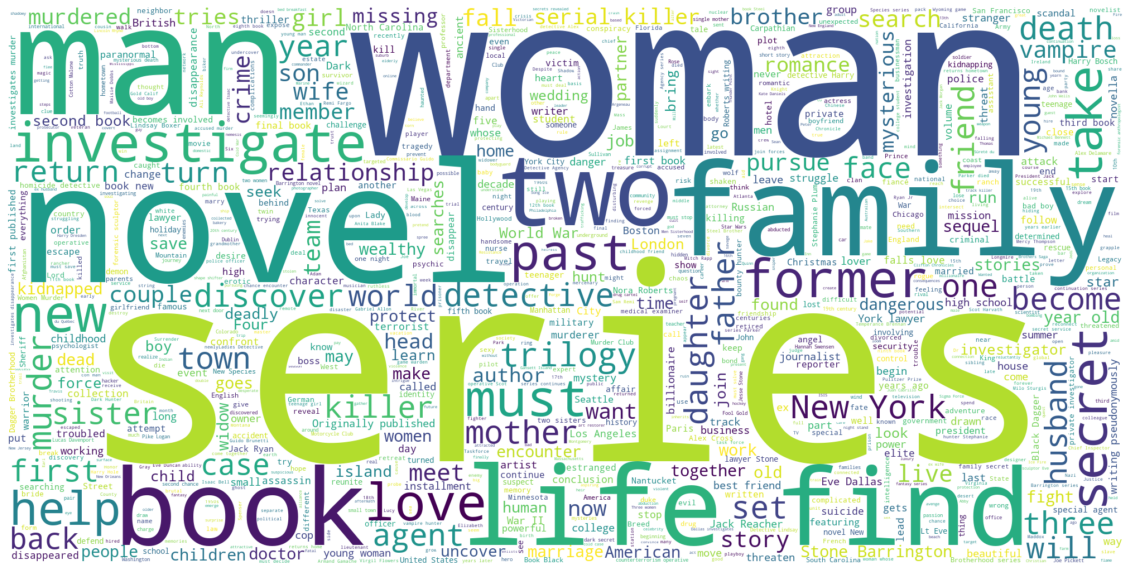

In [46]:
# build a word cloud

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=1000, width=2000, height=1000).generate(' '.join(str(word) for word in wordbank))

# display the word cloud

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

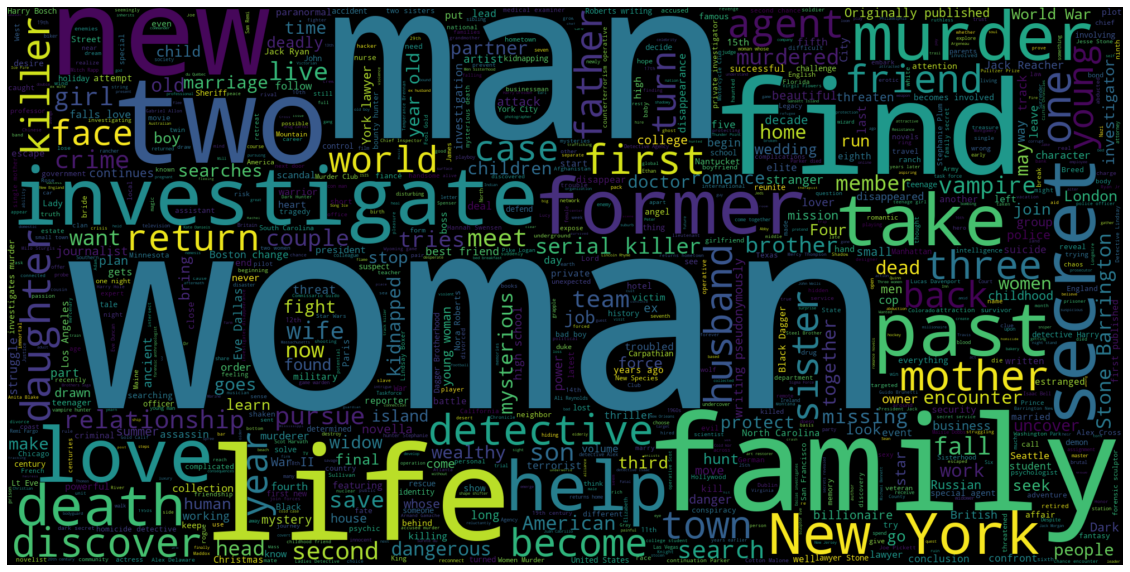

In [48]:
# add the uninteresting words to stopwords

stopwords.add('novel')
stopwords.add("series")
stopwords.add("book")
stopwords.add("author")
stopwords.add("writer")
stopwords.add("trilogy")
stopwords.add("stories")
stopwords.add("sequel")
stopwords.add("story")
stopwords.add("Originally published")
stopwords.add("installment")
stopwords.add("set")
stopwords.add("sets")
stopwords.add("Stone Barrington")
stopwords.add("continue")
stopwords.add("must")
stopwords.add("called")
stopwords.add("Jack Reacher")
stopwords.add("will")

# re-generate the word cloud

wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=1000, width=2000, height=1000).generate(' '.join(str(word) for word in wordbank))

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Image opened and saved!


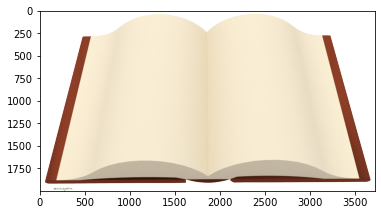

In [49]:
# open image (just make sure it's in your working directory) and save mask to book

book = np.array(PIL.Image.open('book.png'))

imshow(book)

print('Image opened and saved!')

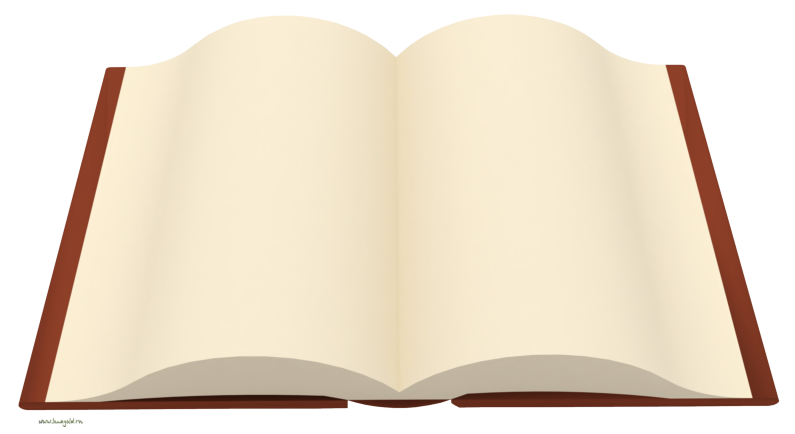

In [50]:
# display mask image

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(book, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

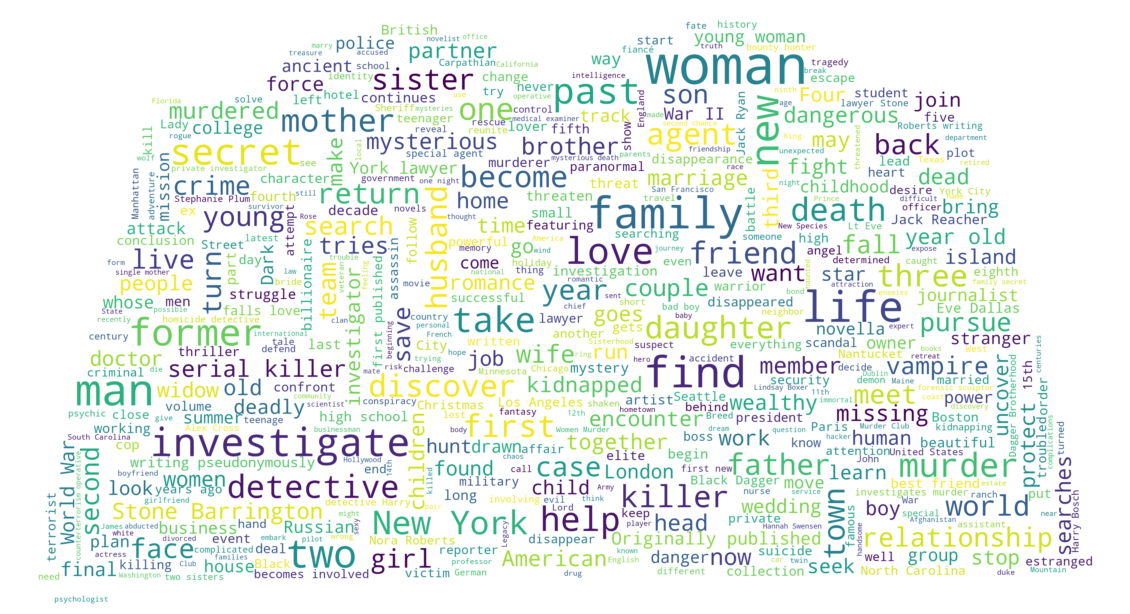

In [51]:
# instantiate a word cloud object
book_wc = WordCloud(background_color='white', max_words=500, mask=book, stopwords=stopwords)

# generate the word cloud
book_wc.generate(' '.join(str(word) for word in wordbank))

# display the word cloud
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(book_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


# Text Generation

In [54]:
df = pd.read_csv('combined_print_and_e_book_fiction.csv')

In [55]:
df = df[['description']]

In [56]:
# df = df[['description']].drop_duplicates().reset_index(drop=True)

df

,description
0,The New York detective Michael Bennett enlists...
1,A hacker and a journalist investigate the disa...
2,In the second volume of the Millennium trilogy...
3,"The third volume of the Millennium trilogy, ab..."
4,"After his parents die in a car accident, young..."
...,...
8755,Years after an international Ponzi scheme fall...
8756,The connection between a high school star athl...
8757,The third book in the Wolf Hall trilogy. After...
8758,The 13th book in the Steel Brothers Saga.


In [57]:
text = df['description'].str.lower()
text = text.str.replace('\d+', '')
text = text.astype('str')
text

0       the new york detective michael bennett enlists...
1       a hacker and a journalist investigate the disa...
2       in the second volume of the millennium trilogy...
3       the third volume of the millennium trilogy, ab...
4       after his parents die in a car accident, young...
                              ...                        
8755    years after an international ponzi scheme fall...
8756    the connection between a high school star athl...
8757    the third book in the wolf hall trilogy. after...
8758              the th book in the steel brothers saga.
8759    as a bill that may hurt the rights of native a...
Name: description, Length: 8760, dtype: object

In [58]:
text_model_1 = markovify.NewlineText(text, state_size = 3)
text_model_2 = markovify.NewlineText(text, state_size = 3)
text_model_3 = markovify.NewlineText(text, state_size = 3)
text_model_4 = markovify.NewlineText(text, state_size = 3)
text_model_5 = markovify.NewlineText(text, state_size = 3)

In [59]:
model_combo = markovify.combine([ text_model_1, text_model_2, text_model_3, text_model_4, text_model_5 ], [ 1, 1, 1, 1, 1])

# Print randomly-generated sentences using the built model

for idx, i in enumerate(range(10)):
    print('(',idx+1,')','   ', model_combo.make_sentence(tries=10000, max_overlap_ratio = 0.25, test_output= True))

( 1 )     a concentration camp detainee tasked with permanently marking fellow prisoners falls in love with a tortured man who has been acquitted of his wife’s murder retreats to his family’s ancestral home, a skull discovered in the snow in lake eden, minn., baker hannah swensen accidentally hits a stranger with a terrible secret. originally published in .
( 2 )     a man who studies wolves must make difficult decisions when he is accused of having played a role in the murder of a troublesome -year-old boy in the th inspector lynley novel, lynley’s partner barbara havers searches for a young man may have witnessed a crime across from her harlem townhouse.
( 3 )     None
( 4 )     ana steele learns more about christian grey’s troubled past; the second book in the commissario guido brunetti becomes involved when an accused murderer tries to prevent his trial in this women's murder club discover that the murder they’re investigating was committed by a serial killer who builds snowmen out